<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/distributiontests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribution Tests

*Author: Alexander Del Toro Barba*

# Import Libraries

In [1]:
# Import packages
import numpy as np
import sklearn
from decimal import *
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import collections
import datetime
import matplotlib
from scipy import stats
import scipy.stats as stats
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from numpy import sqrt
from copy import copy
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import statsmodels
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Create Data

**Random Walk Process**

In [0]:
def geometric_brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20):        
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

dates = pd.date_range('2012-01-01', '2019-02-22')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
randomwalk = pd.Series(
    geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)

**White Noise Process**

In [0]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot

# seed random number generator
seed(1)

# create white noise series
whitenoise = [gauss(0.0, 1.0) for i in range(3000)]
whitenoise = Series(whitenoise)

# Visualize Data

## Random Walk Process

Text(0, 0.5, 'Value')

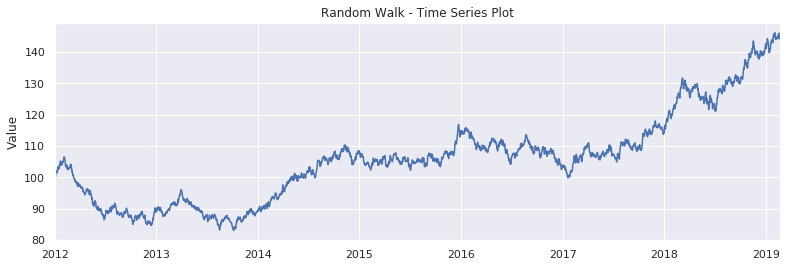

In [4]:
df = randomwalk
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.5,title='Random Walk - Time Series Plot')
plt.ylabel('Value')

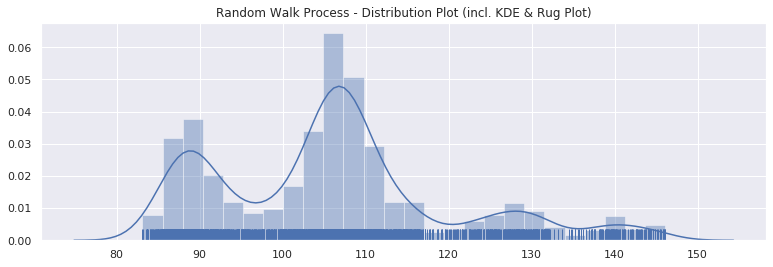

In [6]:
df = randomwalk
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Random Walk Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

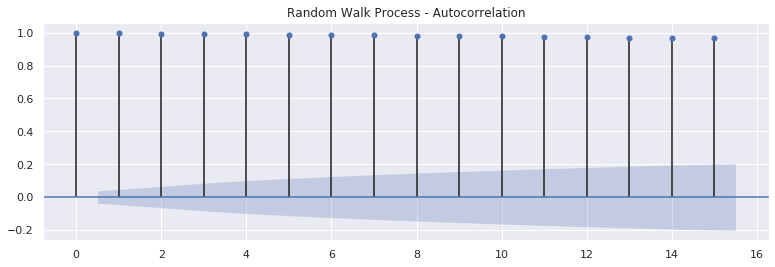

In [7]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(randomwalk.squeeze(), lags=15)
plt.title('Random Walk Process - Autocorrelation')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


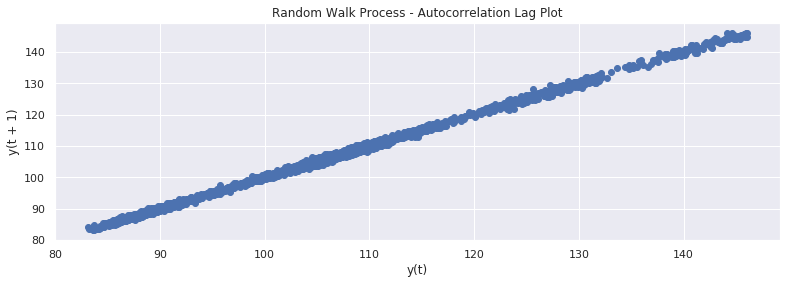

In [8]:
lag_plot(randomwalk)
plt.title('Random Walk Process - Autocorrelation Lag Plot')
plt.show()

## White Noise Process

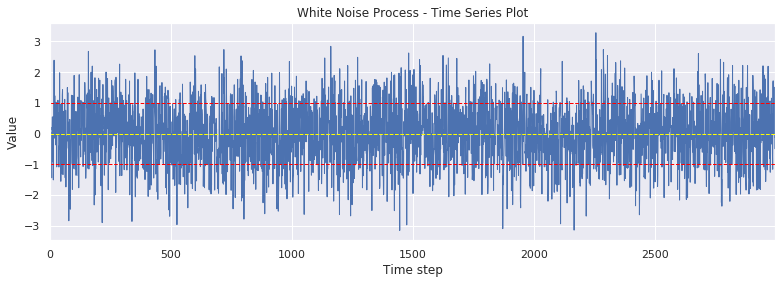

In [9]:
df = whitenoise
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.0,title='White Noise Process - Time Series Plot')
plt.ylabel('Value')
plt.xlabel('Time step')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=-1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0);

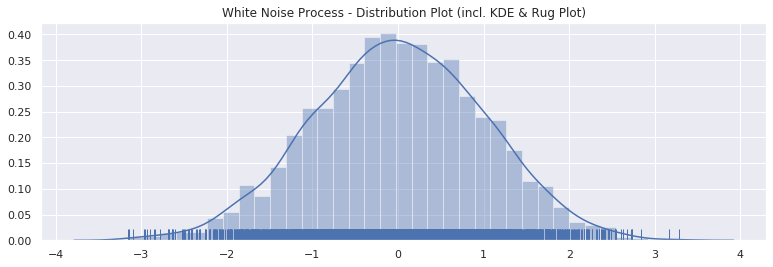

In [10]:
df = whitenoise
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('White Noise Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

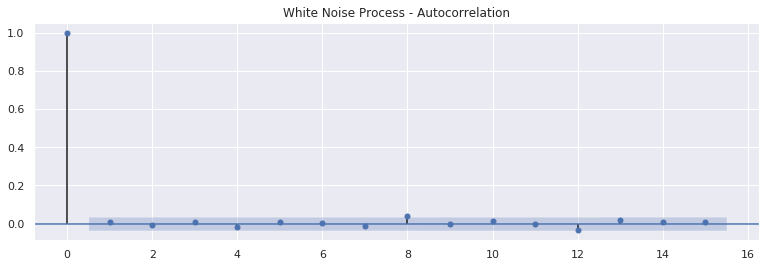

In [11]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(whitenoise.squeeze(), lags=15)
plt.title('White Noise Process - Autocorrelation')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


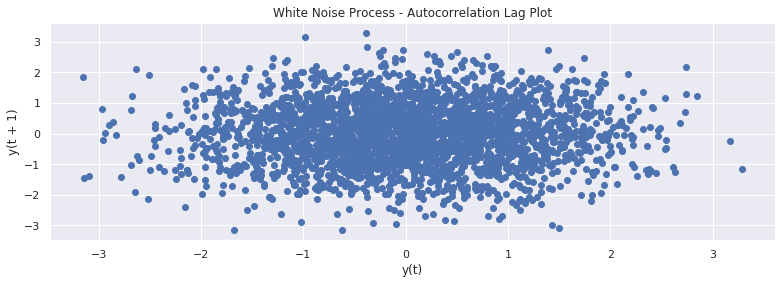

In [12]:
lag_plot(whitenoise)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

# Select Data Source

In [0]:
# series = whitenoise
series = randomwalk

# QQ Plots

## Normal Distribution

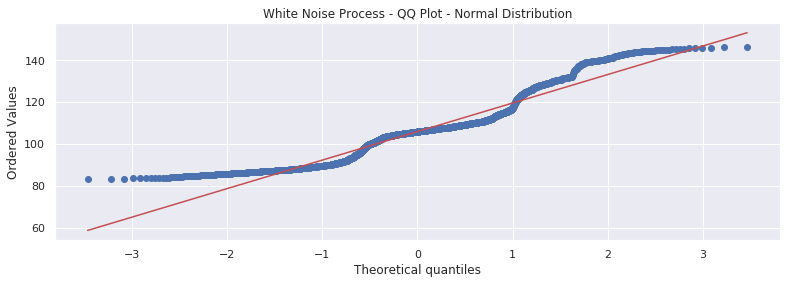

In [14]:
stats.probplot(series, dist="norm", plot=plt)
plt.title('White Noise Process - QQ Plot - Normal Distribution')
plt.show()

## Residuals

**QQ Plot of the residuals against quantiles of t-distribution with mean 3 and std 10**

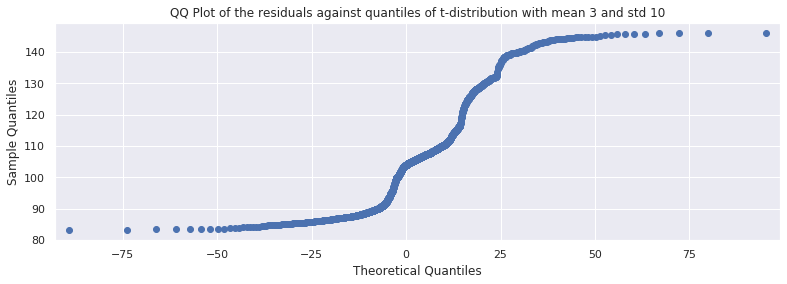

In [15]:
fig = sm.qqplot(series, stats.t, distargs=(4,), loc=3, scale=10)
plt.title('QQ Plot of the residuals against quantiles of t-distribution with mean 3 and std 10')
plt.show()

## Parameter Determination for t-Dist

**Automatically determine parameters for t distribution including the loc and scale**

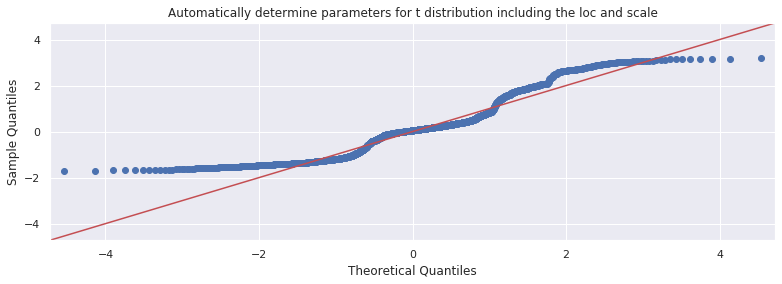

In [16]:
fig = sm.qqplot(series, stats.t, fit=True, line='45')
plt.title('Automatically determine parameters for t distribution including the loc and scale')
plt.show()

## Cauchy Distribution

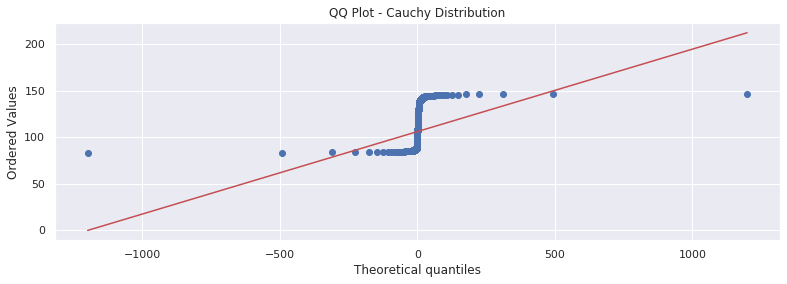

In [17]:
stats.probplot(series, dist="cauchy", plot=plt)
plt.title('QQ Plot - Cauchy Distribution')
plt.show()

## Levy Distribution

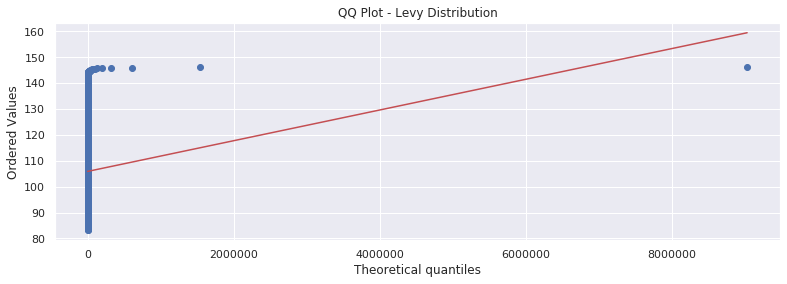

In [18]:
stats.probplot(series, dist="levy", plot=plt)
plt.title('QQ Plot - Levy Distribution')
plt.show()

# Distribution Tests

## BDS Independence Test

In [19]:
# BDS test statistic for independence of a time series
# Time Series is IID (= Null Hypothesis)
statsmodels.tsa.stattools.bds(series, max_dim=2, epsilon=None, distance=1.5)

(array(128.94654336), array(0.))

## Kolmogorov-Smirnov Test

In [20]:
# Kolmogorov-Smirnov Test
stats.kstest(series, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

## Jarque-Bera Test

compares sample skewness and kurtosis to 0 and 3, their values under normality.

The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html

Null hypothesis: sample is normal distributed. JB(PValue<0.05)= Reject Ho (Non-Normal Distribution)

In [21]:
stats.jarque_bera(series)

(212.37640630931404, 0.0)

## Anderson-Darling Test

Anderson Darling tests whether the sample from the population follows a particular distribution (default: normal).

In [22]:
stats.anderson(series)

AndersonResult(statistic=53.16888148167436, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))